In [1]:
import pandas as pd

financial_train = pd.read_excel('financial_train.xlsx')
financial_train.head()



,종목코드,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,레이블
0,360,6130.333968,0.846342,-32.596321,-0.036030,-2674.128824,-661.336250,1
1,420,719.682766,0.541509,-5.124169,-0.504883,-223.327431,-257.465802,1
2,790,2062.599327,1.009479,4.145668,0.311749,519.444543,-994.835473,1
3,800,18007.307005,0.978722,2.499255,0.751287,342.479670,131.586231,1
4,895,2098.958240,0.583371,1.620366,0.022887,152.864625,49.455226,1


In [2]:
non_financial_train=pd.read_excel('non_financial_train.xlsx')
non_financial_train.head()


,종목코드,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,360,0,0,0,0,0,0,1
1,420,0,0,0,0,2,0,1
2,790,0,0,0,0,1,0,1
3,800,0,0,2,0,1,0,1
4,895,0,0,1,0,0,0,1


In [3]:
all_financial_train=pd.concat([financial_train,non_financial_train], axis=1)
all_financial_train=all_financial_train.drop(columns='종목코드')
all_financial_train=all_financial_train.drop(all_financial_train.columns[6],axis=1)
all_financial_train=pd.concat([all_financial_train,financial_train['레이블']],axis=1)
all_financial_train

,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,6130.333968,0.846342,-32.596321,-0.036030,-2674.128824,-661.336250,0,0,0,0,0,0,1
1,719.682766,0.541509,-5.124169,-0.504883,-223.327431,-257.465802,0,0,0,0,2,0,1
2,2062.599327,1.009479,4.145668,0.311749,519.444543,-994.835473,0,0,0,0,1,0,1
3,18007.307005,0.978722,2.499255,0.751287,342.479670,131.586231,0,0,2,0,1,0,1
4,2098.958240,0.583371,1.620366,0.022887,152.864625,49.455226,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1985.405663,0.731531,0.113090,-0.054453,81.426011,120.266492,0,0,0,0,0,0,0
896,2851.121376,1.416081,1.136097,0.169801,302.488733,143.421310,0,0,0,0,0,0,0
897,1985.320541,0.723308,0.944468,0.085490,140.644956,167.827144,0,0,0,0,0,0,0
898,57.717351,0.519267,0.804160,-0.119452,93.684109,2.420840,0,0,0,0,0,0,0


In [4]:
test_file=pd.read_excel('test.xlsx')
test_file.head()

,종목코드,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,4230,428.244201,0.145047,2.504589,-0.474146,50.832895,-110.196437,4,0,12,0,4,9,1
1,8400,4235.038475,0.230752,87.004072,-0.219220,2030.707545,-609.697673,0,0,0,2,3,4,1
2,11720,401.758378,0.726854,2.599183,0.221462,261.607927,-53.147792,6,0,7,0,1,4,1
3,14420,401.349197,0.043593,0.569677,-0.886067,6.842714,-101.499864,16,8,7,0,24,2,1
4,19640,960.761224,1.846953,-2.448133,0.374269,-267.463377,-1177.175957,2,2,1,0,9,0,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score    
import matplotlib.pyplot as plt
import seaborn as sns

data_f = financial_train[['총자산','총자본회전율','부채비율','매출액증가율','자기자본회전율','당기순이익']]
target_f=financial_train['레이블']

data_nf = non_financial_train[['최대주주변경','대표이사변경','전환사채','파산신청','거래정지','불성실공시법인']]
target_nf=non_financial_train['레이블']

train_data_f,test_data_f,train_target_f,test_target_f= train_test_split(data_f,target_f,test_size=0.2,random_state=40)

train_data_nf,test_data_nf,train_target_nf,test_target_nf = train_test_split(data_nf,target_nf,test_size=0.2,random_state=40)

# 결과 1) 재무/비재무 사용한 각 모델의 성능 비교

# 1-1. LogisticRegression 

In [6]:
# 재무정보 feature by LogisticRegression

lr = LogisticRegression()
lr.fit(train_data_f,train_target_f)

lr_pred1 = lr.predict(test_data_f)
print(lr_pred1)

# 모델 평가
print(lr.score(train_data_f,train_target_f))
print(lr.score(test_data_f,test_target_f))

# 분류 보고서 출력
cr1 = classification_report(test_target_f,lr_pred1,digits=4)
print("Logistic Regression Classification Report:")
print(cr1)


# 혼동 행렬 출력
cm1 = confusion_matrix(test_target_f,lr_pred1)
print("Confusion Matrix:")
print(cm1)

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(test_target_f,lr_pred1))

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1
 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
0.9069444444444444
0.9
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9051    0.9612    0.9323       129
           1     0.8837    0.7451    0.8085        51

    accuracy                         0.9000       180
   macro avg     0.8944    0.8532    0.8704       180
weighted avg     0.8990    0.9000    0.8972       180

Confusion Matrix:
[[124   5]
 [ 13  38]]
Accuracy Score:
0.9


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#비재무정보 features by LogisticRegression

lr_nf = LogisticRegression()
lr_nf.fit(train_data_nf,train_target_nf)

lr_pred2 = lr_nf.predict(test_data_nf)
print(lr_pred2)

# 모델 평가
print(lr_nf.score(train_data_nf,train_target_nf))
print(lr_nf.score(test_data_nf,test_target_nf))

# 분류 보고서 출력
cr2 = classification_report(test_target_nf,lr_pred2,digits=4)
print("Logistic Regression Classification Report:")
print(cr2)


# 혼동 행렬 출력
cm2 = confusion_matrix(test_target_nf,lr_pred2)
print("Confusion Matrix:")
print(cm2)

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(test_target_nf,lr_pred2))


[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]
0.9611111111111111
0.9388888888888889
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9338    0.9845    0.9585       129
           1     0.9545    0.8235    0.8842        51

    accuracy                         0.9389       180
   macro avg     0.9442    0.9040    0.9214       180
weighted avg     0.9397    0.9389    0.9374       180

Confusion Matrix:
[[127   2]
 [  9  42]]
Accuracy Score:
0.9388888888888889


In [8]:

# 재무정보와 비재무정보를 모두 병합한 데이터프레임으로 구한 coef_값
data3=all_financial_train[['총자산','총자본회전율','부채비율','매출액증가율','자기자본회전율','당기순이익','최대주주변경','대표이사변경','전환사채','파산신청','거래정지','불성실공시법인']]
target3=all_financial_train['레이블']

train_data_3,test_data_3,train_target_3,test_target_3=train_test_split(data3,target3,test_size=0.2,random_state=40)
lr3=LogisticRegression()
lr3.fit(train_data_3,train_target_3)

lr_pred3 = lr3.predict(test_data_3)
print(lr_pred3)

# 모델 평가
print(lr3.score(train_data_3,train_target_3))
print(lr3.score(test_data_3,test_target_3))

# 분류 보고서 출력
cr3 = classification_report(test_target_3,lr_pred3,digits=4)
print("Logistic Regression Classification Report:")
print(cr3)


# 혼동 행렬 출력
cm3 = confusion_matrix(test_target_3,lr_pred3)
print("Confusion Matrix:")
print(cm3)

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(test_target_3,lr_pred3))
# coef_값 상위 5개
keywords = pd.DataFrame(lr3.coef_, columns=['총자산','총자본회전율','부채비율','매출액증가율','자기자본회전율','당기순이익','최대주주변경','대표이사변경','전환사채','파산신청','거래정지','불성실공시법인'])
keywords_1_1=keywords.T.sort_values(by=0,ascending=False)
keywords_1_1

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]
0.9541666666666667
0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9545    0.9767    0.9655       129
           1     0.9375    0.8824    0.9091        51

    accuracy                         0.9500       180
   macro avg     0.9460    0.9295    0.9373       180
weighted avg     0.9497    0.9500    0.9495       180

Confusion Matrix:
[[126   3]
 [  6  45]]
Accuracy Score:
0.95


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
거래정지,1.209072
부채비율,0.162955
불성실공시법인,0.144647
매출액증가율,0.035948
자기자본회전율,-0.000491
총자산,-0.000804
당기순이익,-0.002419
전환사채,-0.093676
대표이사변경,-0.212043
최대주주변경,-0.287541


# Logistic Regression's macro avg
# (0.9460 + 0.9295+ 0.9373)/3 = 0.9376

# 1-2. RandomForestClassifier 

<>:50: SyntaxWarning: invalid escape sequence '\W'
<>:95: SyntaxWarning: invalid escape sequence '\W'
<>:148: SyntaxWarning: invalid escape sequence '\W'
<>:50: SyntaxWarning: invalid escape sequence '\W'
<>:95: SyntaxWarning: invalid escape sequence '\W'
<>:148: SyntaxWarning: invalid escape sequence '\W'
C:\Users\USER\AppData\Local\Temp\ipykernel_17576\2165206233.py:50: SyntaxWarning: invalid escape sequence '\W'
  font_location = 'C:\Windows\Fonts\malgun.ttf'
C:\Users\USER\AppData\Local\Temp\ipykernel_17576\2165206233.py:95: SyntaxWarning: invalid escape sequence '\W'
  font_location = 'C:\Windows\Fonts\malgun.ttf'
C:\Users\USER\AppData\Local\Temp\ipykernel_17576\2165206233.py:148: SyntaxWarning: invalid escape sequence '\W'
  font_location = 'C:\Windows\Fonts\malgun.ttf'


              총자산    총자본회전율    매출액증가율      자기자본회전율       당기순이익       부채비율
0     6130.333968  0.846342 -0.036030 -2674.128824 -661.336250 -32.596321
1      719.682766  0.541509 -0.504883  -223.327431 -257.465802  -5.124169
2     2062.599327  1.009479  0.311749   519.444543 -994.835473   4.145668
3    18007.307005  0.978722  0.751287   342.479670  131.586231   2.499255
4     2098.958240  0.583371  0.022887   152.864625   49.455226   1.620366
..            ...       ...       ...          ...         ...        ...
895   1985.405663  0.731531 -0.054453    81.426011  120.266492   0.113090
896   2851.121376  1.416081  0.169801   302.488733  143.421310   1.136097
897   1985.320541  0.723308  0.085490   140.644956  167.827144   0.944468
898     57.717351  0.519267 -0.119452    93.684109    2.420840   0.804160
899      0.736681  0.451249 -0.999999    69.733865   -0.192689   0.545353

[900 rows x 6 columns]
0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    

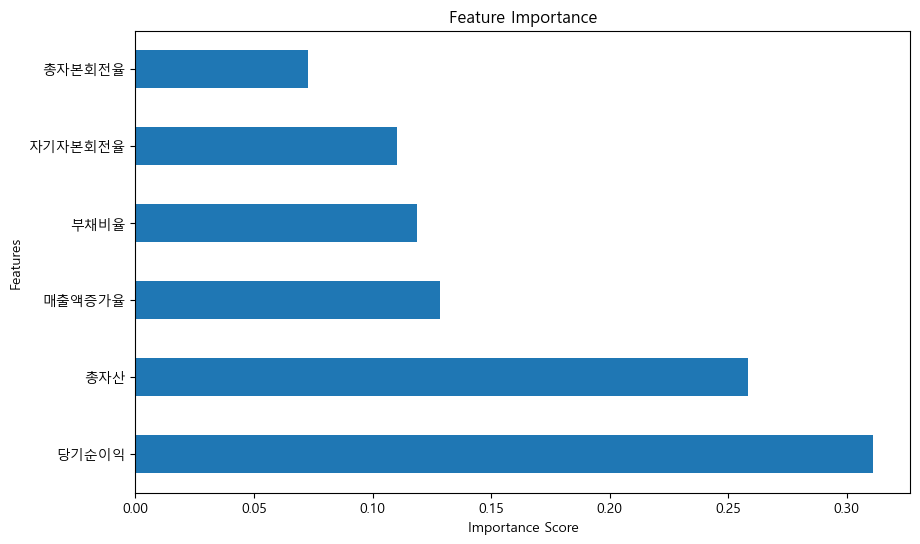

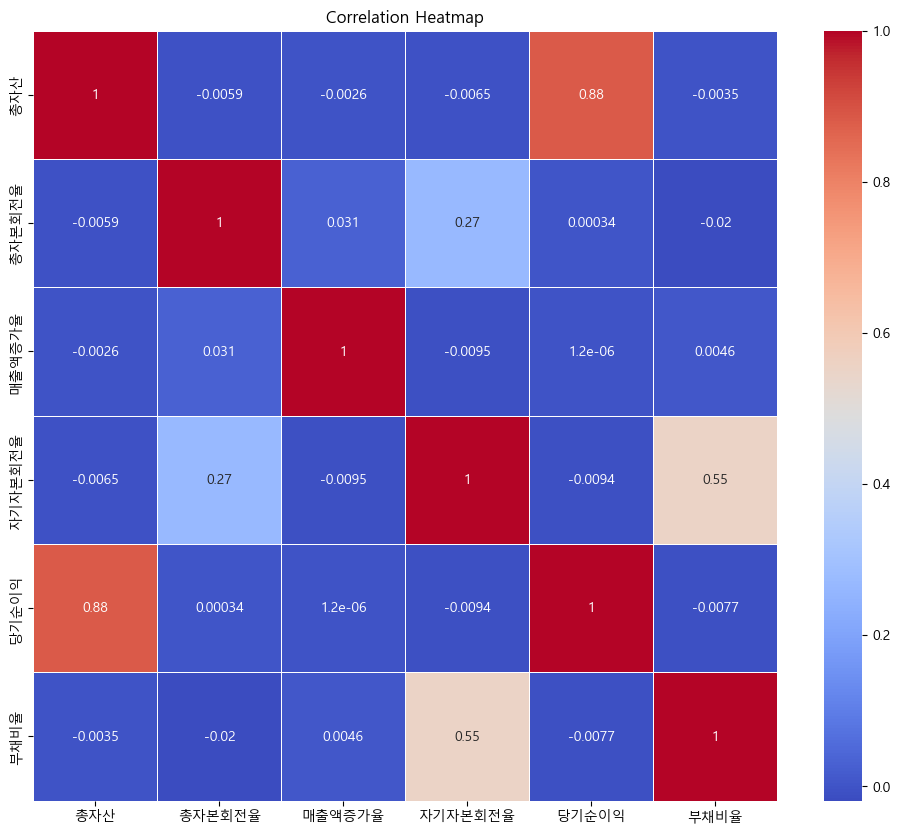

     최대주주변경  대표이사변경  전환사채  파산신청  거래정지  불성실공시법인
0         0       0     0     0     0        0
1         0       0     0     0     2        0
2         0       0     0     0     1        0
3         0       0     2     0     1        0
4         0       0     1     0     0        0
..      ...     ...   ...   ...   ...      ...
895       0       0     0     0     0        0
896       0       0     0     0     0        0
897       0       0     0     0     0        0
898       0       0     0     0     0        0
899       3       4    17     0     1        2

[900 rows x 6 columns]
0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: 레이블, Length: 900, dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       129
           1       0.91      0.84      0.88        51

    accuracy                           0.93       180
   macro avg       0.93      0.91      0.92       180
weig

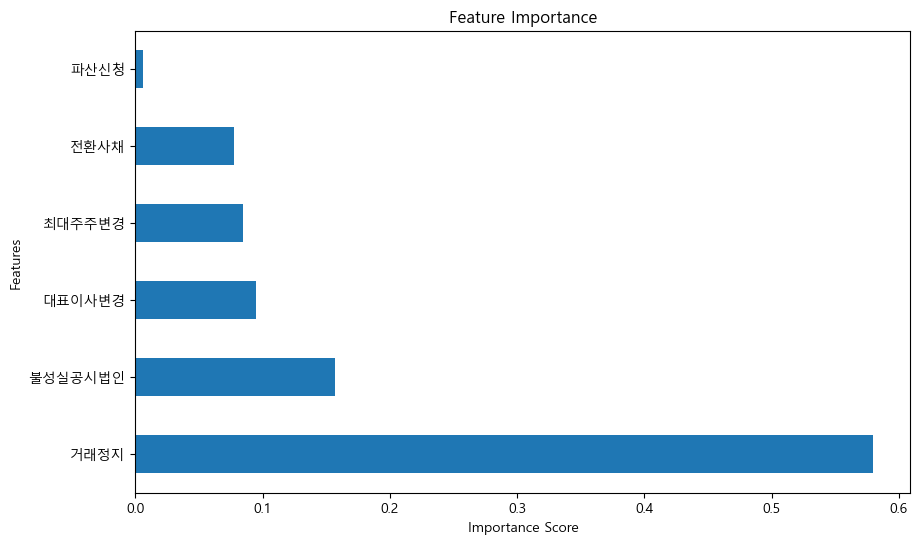

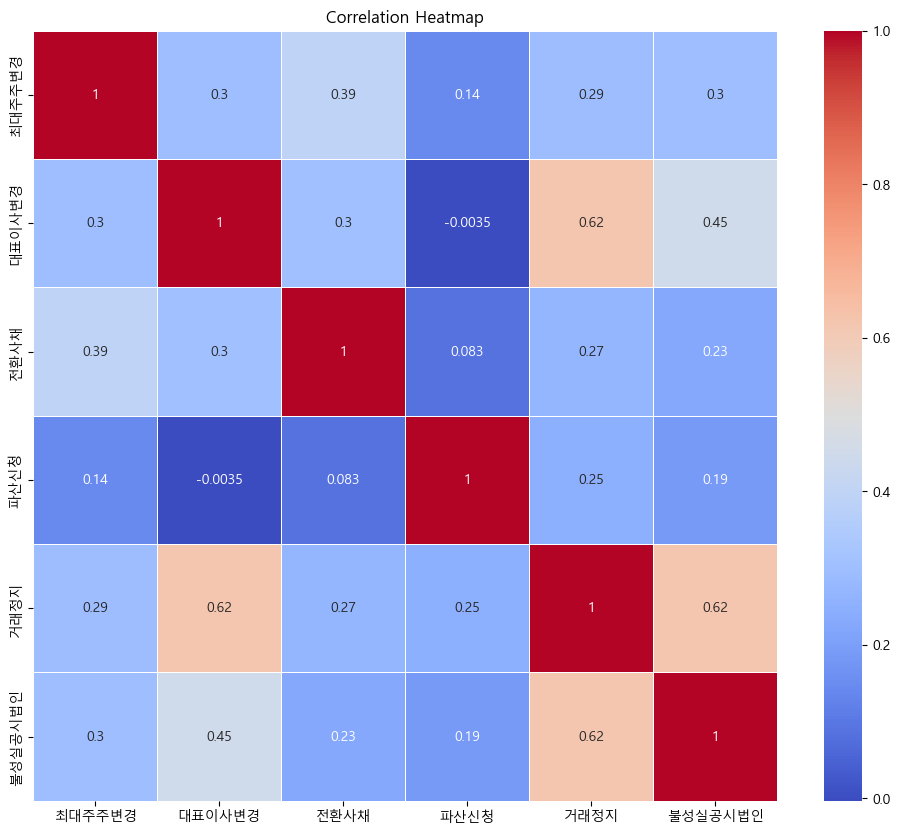

     거래정지  불성실공시법인    매출액증가율           총자산       부채비율
0       0        0 -0.036030   6130.333968 -32.596321
1       2        0 -0.504883    719.682766  -5.124169
2       1        0  0.311749   2062.599327   4.145668
3       1        0  0.751287  18007.307005   2.499255
4       0        0  0.022887   2098.958240   1.620366
..    ...      ...       ...           ...        ...
895     0        0 -0.054453   1985.405663   0.113090
896     0        0  0.169801   2851.121376   1.136097
897     0        0  0.085490   1985.320541   0.944468
898     0        0 -0.119452     57.717351   0.804160
899     1        2 -0.999999      0.736681   0.545353

[900 rows x 5 columns]
0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: 레이블, Length: 900, dtype: int64
              precision    recall  f1-score   support

           0     0.9474    0.9767    0.9618       129
           1     0.9362    0.8627    0.8980        51

    accuracy                

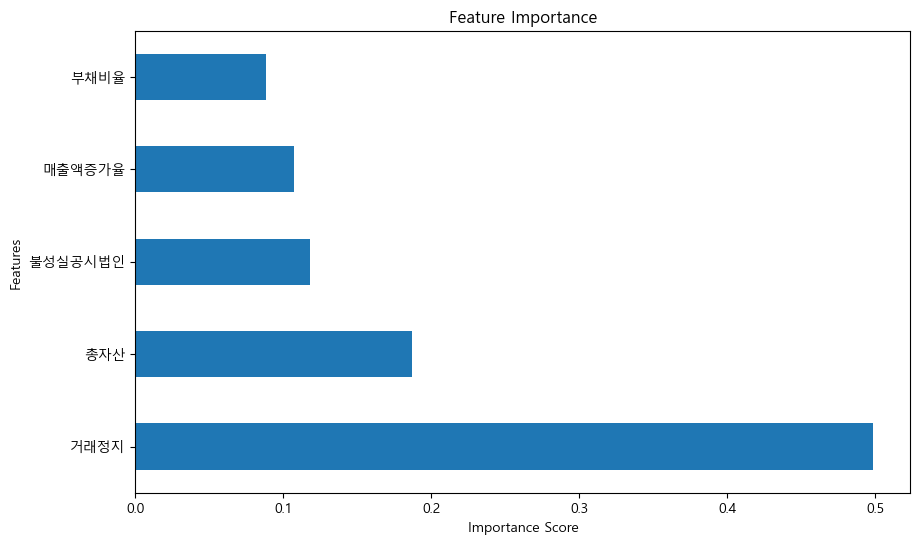

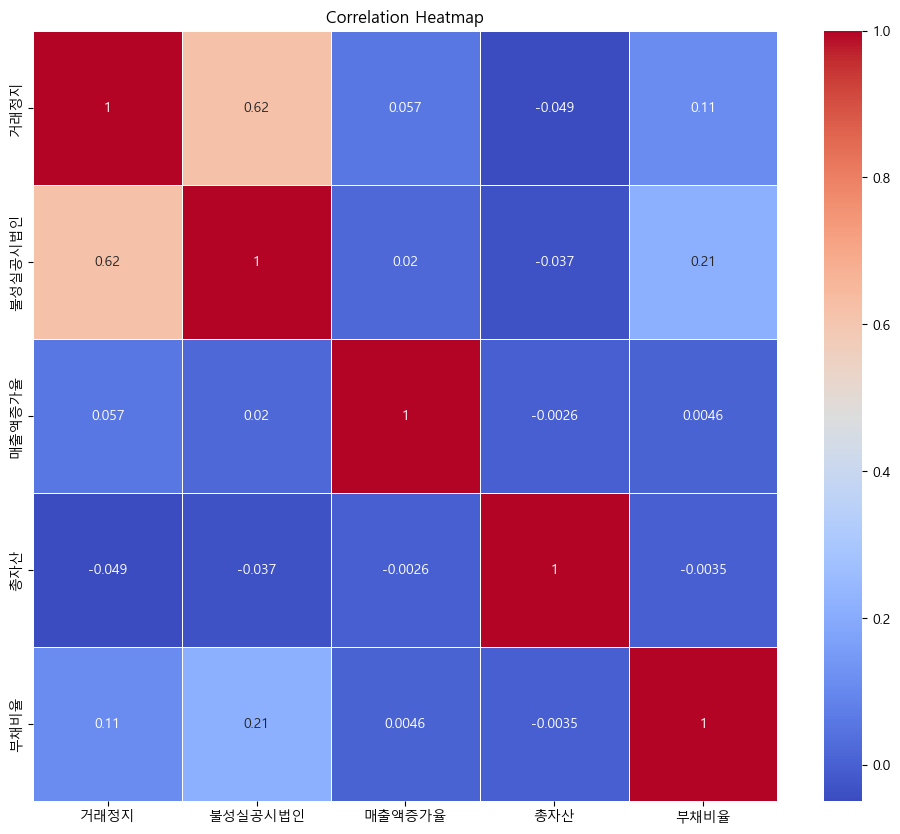

In [9]:
# 파일 읽어오기
import pandas as pd
test_data = pd.read_excel('test.xlsx')
financial_train = pd.read_excel('financial_train.xlsx')
non_financial_train = pd.read_excel('non_financial_train.xlsx')
test_data
financial_train
non_financial_train
# 재무정보 & 비재무정보 데이터 합치기
financial = pd.concat([financial_train, non_financial_train], axis=1)
financial = financial.drop(["레이블"], axis=1)
financial = financial.drop(["종목코드"], axis=1)
financial = pd.concat([financial, financial_train["레이블"]], axis=1)
financial
# 데이터 이상치 확인
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1-3) 랜덤포레스트 재무정보
from sklearn.model_selection import train_test_split

X = financial_train[["총자산", "총자본회전율", "매출액증가율", "자기자본회전율", "당기순이익", "부채비율", ]]
y = financial_train["레이블"]
print(X)
print(y)

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(random_state=40)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가(report, confusion martrix)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print((0.91+0.90+0.90)/3)
# (0.91 + 0.90 + 0.90) ÷ 3 = 0.9033
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# 1-2) 랜덤포레스트 비재무정보
from sklearn.model_selection import train_test_split

X = non_financial_train[["최대주주변경", "대표이사변경", "전환사채", "파산신청", "거래정지", "불성실공시법인"]]
y = non_financial_train["레이블"]
print(X)
print(y)

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(random_state=40)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# 1-3) 랜덤포레스트 합본
from sklearn.model_selection import train_test_split

X = financial[["거래정지", "불성실공시법인", "매출액증가율", "총자산", "부채비율"]]
y = financial["레이블"]
print(X)
print(y)

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature 중요도 추출
importances = rf.feature_importances_
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(random_state=40)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# RandomForestClssifier's macro avg
# (0.9418+0.9197+0.9299)/3 = 0.9305

# 1-3. DecisionTreeClassifier 

In [10]:
import pandas as pd

financial_train = pd.read_excel('financial_train.xlsx')
financial_train
non_financial_train = pd.read_excel('non_financial_train.xlsx')
non_financial_train
test = pd.read_excel('test.xlsx')
test
# - 재무정보와 비재무정보 데이터 분할
from sklearn.model_selection import train_test_split

fn_data = financial_train.drop('레이블', axis=1).to_numpy()
fn_target = financial_train['레이블'].to_numpy()
fn_train_data, fn_test_data, fn_train_target, fn_test_target = train_test_split(fn_data, fn_target, test_size=0.2, random_state=40)
nfn_data = non_financial_train.drop('레이블', axis=1).to_numpy()
nfn_target = non_financial_train['레이블'].to_numpy()
nfn_train_data, nfn_test_data, nfn_train_target, nfn_test_target = train_test_split(nfn_data, nfn_target, test_size=0.2, random_state=40)
# - 합친 데이터도 분할?
efn_data = all_financial_train[['총자산','총자본회전율','부채비율','매출액증가율','자기자본회전율','당기순이익','최대주주변경','대표이사변경','전환사채','파산신청','거래정지','불성실공시법인']].to_numpy()
efn_target = all_financial_train['레이블']

efn_train_data, efn_test_data, efn_train_target, efn_test_target = train_test_split(efn_data, efn_target, test_size=0.2, random_state=40)

# - 모델 학습 및 성능 평가

# 2-1. 재무 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

fn_dt = DecisionTreeClassifier(random_state=40)
fn_dt.fit(fn_train_data, fn_train_target)

y_pred = fn_dt.predict(fn_test_data)

# 결과 평가(report확인, confusion martrix 확인)
print('테스트 :')
print(classification_report(fn_test_target, y_pred,digits=4))
print(confusion_matrix(fn_test_target, y_pred))
print(accuracy_score(fn_test_target, y_pred))

# 2-2. 비재무 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nfn_dt = DecisionTreeClassifier(random_state=40)
nfn_dt.fit(nfn_train_data, nfn_train_target)

y_pred = nfn_dt.predict(nfn_test_data)

# 결과 평가(report확인, confusion martrix 확인)
print('테스트 :')
print(classification_report(nfn_test_target, y_pred,digits=4))
print(confusion_matrix(nfn_test_target, y_pred))
print(accuracy_score(nfn_test_target, y_pred))

# 2-3. 재무, 비재무 합친 의사결정나무
e_financial = pd.concat([financial_train, non_financial_train], axis=1)
e_financial = e_financial.drop(["레이블"], axis=1)
e_financial = e_financial.drop(["종목코드"], axis=1)
e_financial = pd.concat([e_financial, financial_train["레이블"]], axis=1)

e_financial
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

efn_dt = DecisionTreeClassifier(random_state=40)
efn_dt.fit(efn_train_data, efn_train_target)

y_pred = efn_dt.predict(efn_test_data)

# 결과 평가(report확인, confusion martrix 확인)
print('테스트 :')
print(classification_report(efn_test_target, y_pred,digits=4))
print(confusion_matrix(efn_test_target, y_pred))
print(accuracy_score(efn_test_target, y_pred))
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 예시로 다중 레이블 데이터를 단일 레이블로 변환하는 과정
# 각 샘플에 대해 다중 레이블을 합쳐 단일 레이블로 변환 (여기서는 단순히 각 열의 합계를 사용)

# efn_train_target = np.argmax(efn_train_target, axis=1)
# efn_test_target = np.argmax(efn_test_target, axis=1)

# Decision Tree 모델 학습
efn_dt = DecisionTreeClassifier(random_state=40)
efn_dt.fit(efn_train_data, efn_train_target)

y_pred = efn_dt.predict(efn_test_data)

# 결과 평가 (classification_report, confusion matrix, accuracy score)
print('테스트 :')
print(classification_report(efn_test_target, y_pred,digits=4))
print(confusion_matrix(efn_test_target, y_pred))
print(accuracy_score(efn_test_target, y_pred))



테스트 :
              precision    recall  f1-score   support

           0     0.8955    0.9302    0.9125       129
           1     0.8043    0.7255    0.7629        51

    accuracy                         0.8722       180
   macro avg     0.8499    0.8279    0.8377       180
weighted avg     0.8697    0.8722    0.8701       180

[[120   9]
 [ 14  37]]
0.8722222222222222
테스트 :
              precision    recall  f1-score   support

           0     0.9044    0.9535    0.9283       129
           1     0.8636    0.7451    0.8000        51

    accuracy                         0.8944       180
   macro avg     0.8840    0.8493    0.8642       180
weighted avg     0.8929    0.8944    0.8919       180

[[123   6]
 [ 13  38]]
0.8944444444444445
테스트 :
              precision    recall  f1-score   support

           0     0.9380    0.9380    0.9380       129
           1     0.8431    0.8431    0.8431        51

    accuracy                         0.9111       180
   macro avg     0.8906   

# Decision Tree's macro avg
# (0.8840+0.8493+0.8642)/3 = 0.8658

# 1-4. CatBoost

In [11]:
!pip install catboost


(900, 7) (100, 7) (900,) (100,)
Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.92      0.92      0.92        24

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

[[74  2]
 [ 2 22]]
(900, 7) (100, 7) (900,) (100,)
Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.88      0.96      0.92        24

    accuracy                           0.96       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.96      0.96       100

[[73  3]
 [ 1 23]]
(900, 13) (100, 13) (900,) (100,)
0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: 레이블, Length: 900, dtype: int64
<class 'numpy.ndarray'>
<class 'pandas.c

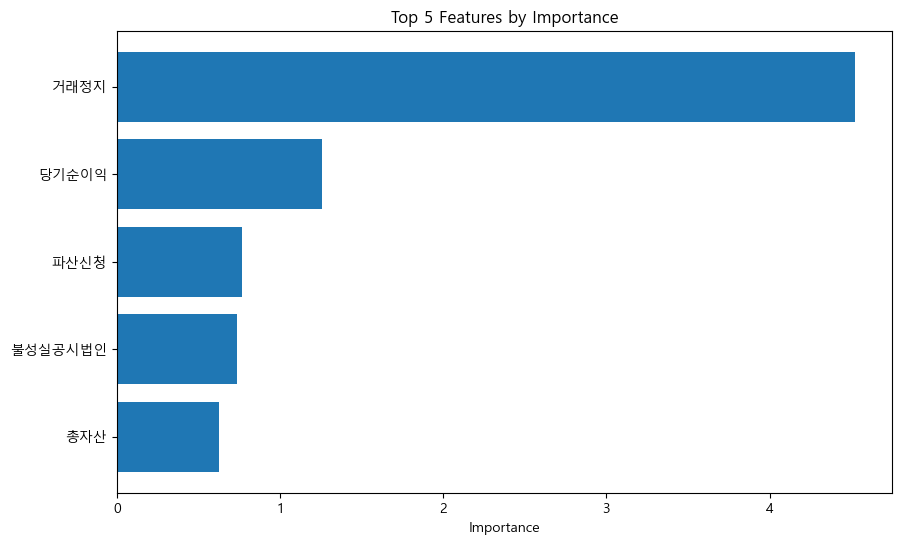

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


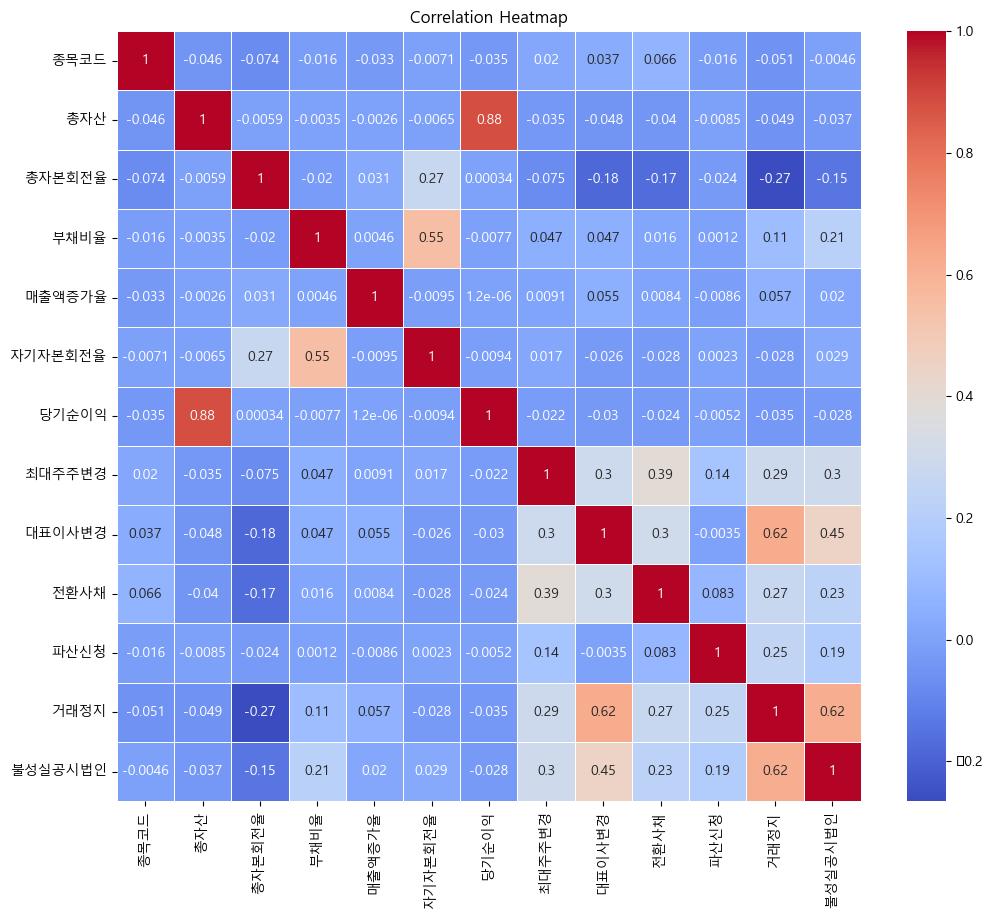

(900, 5) (100, 5) (900,) (100,)
0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: 레이블, Length: 900, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Accuracy: 0.9300
              precision    recall  f1-score   support

           0     0.9367    0.9737    0.9548        76
           1     0.9048    0.7917    0.8444        24

    accuracy                         0.9300       100
   macro avg     0.9207    0.8827    0.8996       100
weighted avg     0.9290    0.9300    0.9283       100

[[74  2]
 [ 5 19]]


In [12]:
# 1. only 재무재표 정보
import pandas as pd
financial_train = pd.read_excel('financial_train.xlsx')
financial_train

test =  pd.read_excel('test.xlsx')
test0 = test.drop(['최대주주변경','대표이사변경','전환사채','파산신청','거래정지','불성실공시법인'],axis=1)
test0
train_data = financial_train.drop('레이블',axis=1).to_numpy()
test_data = test0.drop('레이블',axis=1).to_numpy()
train_target = financial_train['레이블'].to_numpy()
test_target = test0['레이블'].to_numpy()
# 데이터 구조(shape) 확인
print(train_data.shape, test_data.shape, train_target.shape, test_target.shape)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# CatBoostClassifier 생성 및 학습
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
model.fit(train_data, train_target)

# 예측 및 평가
target_pred = model.predict(test_data)
accuracy = accuracy_score(test_target, target_pred)
print(f'Accuracy: {accuracy:.4f}')

from sklearn.metrics import classification_report, confusion_matrix
# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(test_target, target_pred))
print(confusion_matrix(test_target, target_pred))

# 2. only 비재무재표 정보
non_financial_train = pd.read_excel('non_financial_train.xlsx')
non_financial_train
test =  pd.read_excel('test.xlsx')

test1 = test.drop(['총자산','총자본회전율','부채비율','매출액증가율','자기자본회전율','당기순이익'],axis=1)
test1
non_train_data = non_financial_train.drop('레이블',axis=1).to_numpy()
test1_data = test1.drop('레이블',axis=1).to_numpy()
non_train_target = non_financial_train['레이블'].to_numpy()
test1_target = test1['레이블'].to_numpy()
# 데이터 구조(shape) 확인
print(non_train_data.shape, test1_data.shape, non_train_target.shape, test1_target.shape)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# CatBoostClassifier 생성 및 학습
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
model.fit(non_train_data, non_train_target)

# 예측 및 평가
target_pred1 = model.predict(test1_data)
accuracy = accuracy_score(test1_target, target_pred1)
print(f'Accuracy: {accuracy:.4f}')

from sklearn.metrics import classification_report, confusion_matrix
# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(test1_target, target_pred1))
print(confusion_matrix(test1_target, target_pred1))


#3. 재무재표 + 비재무재표 정보
financial_train1 = financial_train.drop('레이블',axis=1)
financial_train1
non_financial_train1 = non_financial_train.drop(['종목코드','레이블'],axis=1)
non_financial_train1
import numpy as np
train_data1 = pd.concat([financial_train1, non_financial_train1], axis=1)
test_data = test.drop('레이블',axis=1)
train_target1 = financial_train['레이블']
test_target = test['레이블']

# 데이터 구조(shape) 확인
print(train_data1.shape, test_data.shape, train_target.shape, test_target.shape)

print(train_target1)

print(type(train_target))
print(type(test_data))
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# CatBoostClassifier 생성 및 학습
model2 = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
model2.fit(train_data1, train_target)

# 예측 및 평가
target_pred2 = model2.predict(test_data)
accuracy = accuracy_score(test_target, target_pred2)
print(f'Accuracy: {accuracy:.4f}')


from sklearn.metrics import classification_report, confusion_matrix
# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(test_target, target_pred2))
print(confusion_matrix(test_target, target_pred2))
#Step 3. 데이터 표준화를 진행합니다
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 13개의 피처만 선택 (모든 피처를 사용한다고 가정)
train_data1_selected = train_data1.iloc[:, :13]
test_data_selected = test_data.iloc[:, :13]

ss = StandardScaler()
ss.fit(train_data1_selected)

표준화_train_data1 = ss.transform(train_data1_selected)
표준화_test_data =ss.transform(test_data_selected)

# 표준화된 데이터를 다시 DataFrame으로 변환하면서 열 이름 유지
표준화_train_data1_df = pd.DataFrame(표준화_train_data1, columns=train_data1_selected.columns)
표준화_test_data_df = pd.DataFrame(표준화_test_data, columns=test_data_selected.columns)

print(train_target1)
print(표준화_train_data1_df)
표준화_test_data
표준화_test_data_df
# 모델을 생성하고 테스트하고 성능을 확인합니다.
from sklearn.linear_model import LogisticRegression
import numpy as np

feature_names = np.array(표준화_train_data1_df.columns)

# 로지스틱회귀분석 모델 생성 및 학습
softmax_reg = LogisticRegression()
softmax_reg.fit(표준화_train_data1_df, train_target1)
softmax_reg.predict(표준화_test_data_df)

# 각 변수의 중요도 계산
importance = np.abs(softmax_reg.coef_[0])


print(feature_names)
# 상위 5개 변수 추출
top_5_indices = np.argsort(importance)[-5:]

# 상위 5개의 변수명과, 중요도 저장
top_5_features = feature_names[top_5_indices]
top_5_importance = importance[top_5_indices]
print("상위 5개 변수:", top_5_features)

# 중요도에 따라 변수 시각화

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_5_features)), top_5_importance, align='center')
plt.yticks(range(len(top_5_features)), top_5_features)
plt.xlabel('Importance')
plt.title('Top 5 Features by Importance')
plt.show()
# 상관관계 히트맵
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(train_data1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
train_data1
train_data_1 = financial_train[['총자산','당기순이익']]
train_data_2 = non_financial_train[['거래정지','파산신청','불성실공시법인']]
train_data2 = pd.concat([train_data_1, train_data_2], axis=1)
train_data2 
test_data2 = test.drop(['종목코드',	'총자본회전율',	'부채비율',	'매출액증가율',	'자기자본회전율',	'최대주주변경',	'대표이사변경',	'전환사채','레이블'],axis=1)
test_data2
train_target2 = financial_train['레이블']
test_target2 = test['레이블']
# 데이터 구조(shape) 확인
print(train_data2.shape, test_data2.shape, train_target2.shape, test_target2.shape)

print(train_target2)

print(type(train_target2))
print(type(test_data2))
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# CatBoostClassifier 생성 및 학습
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
model.fit(train_data2, train_target2)

# 예측 및 평가
target_pred3 = model.predict(test_data2)
accuracy = accuracy_score(test_target2, target_pred3)
print(f'Accuracy: {accuracy:.4f}')


from sklearn.metrics import classification_report, confusion_matrix
# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(test_target2, target_pred3,digits=4))
print(confusion_matrix(test_target2, target_pred3))

# Cat Boost's macro avg

# (0.9207+0.8827+0.8996)/3 = 0.9100

# 결과 2) 최종 선택한 5개의 feature와 이유

상대적으로 accuracy score가 높은 두 모델을 이용해, 공통적으로 coefficient 값이 높은 feature들을 선정하고 그렇지 못한 값들로는 새로운 feature 값을 생성하여 최종 모델에 반영하였습니다

자산대비부채비율 = 총자산 * 부채비율

최종 features : ['거래정지','불성실공시법인','총자산','매출액증가율','자산대비부채비율']



# 결과 3) 최종 사용한 모델과 이유

In [13]:
# 각 모델의 성능 값을 비교

LogisticRegression_macro_avg = 0.9376

RandomForestClassifier_macro_avg = 0.9305

DecisionTreeClassifier_accuracy_macro_avg = 0.8658

CatBoost_macro_avg = 0.9100



# 결과 4) 데이터 전처리과정 포함한 모델추론

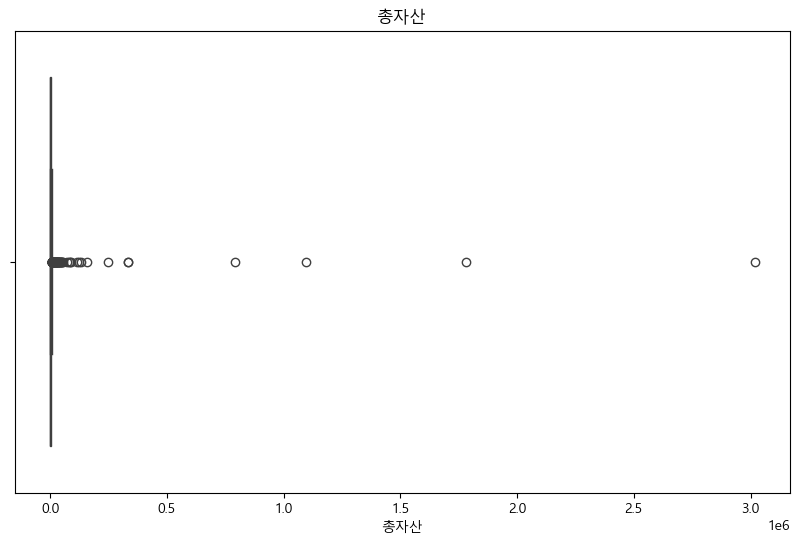

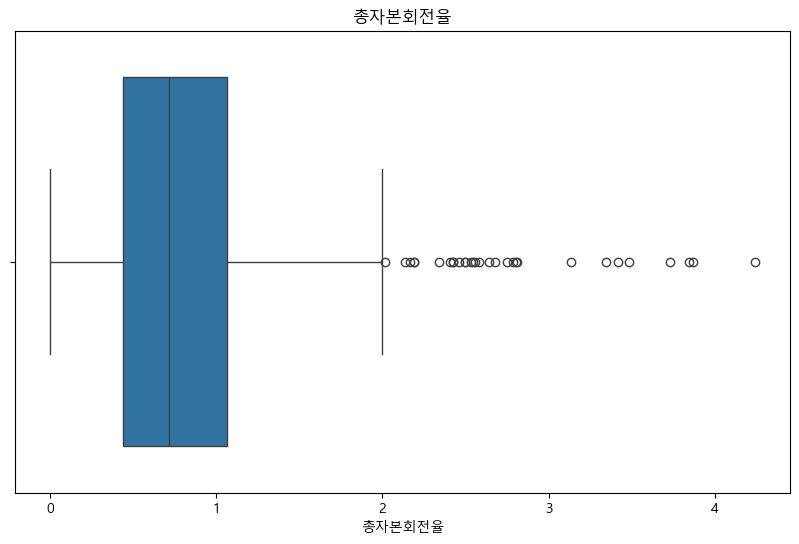

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


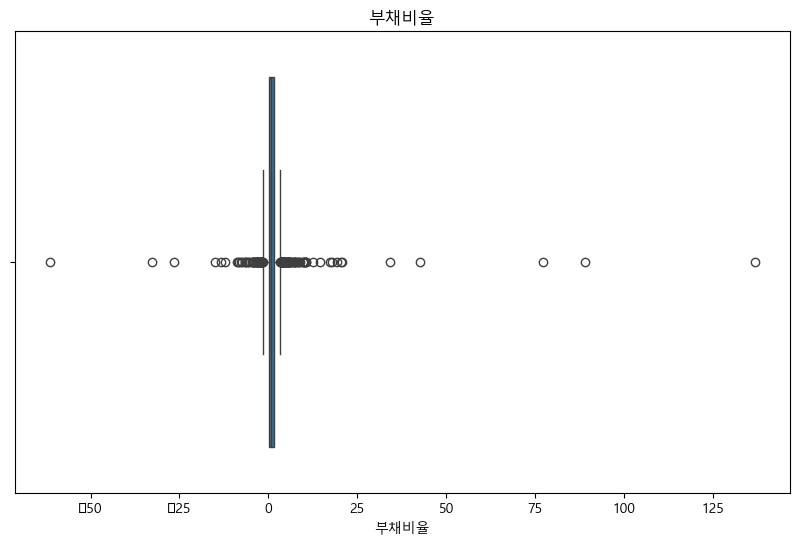

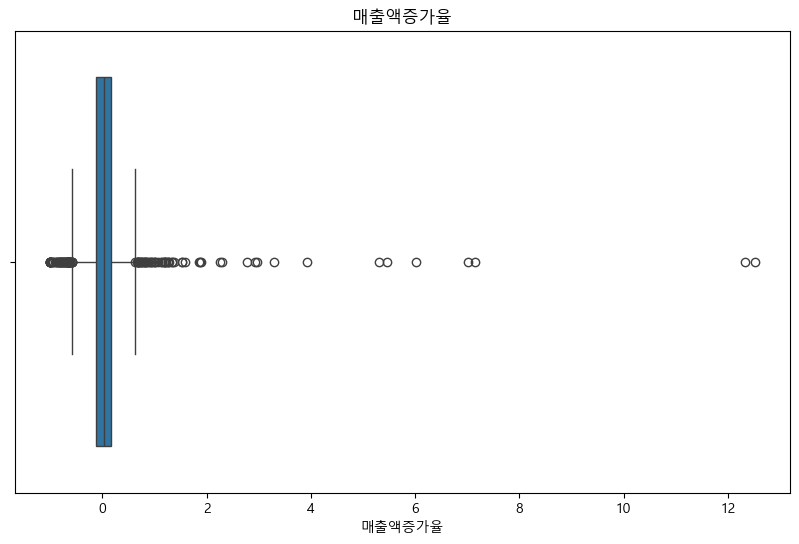

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


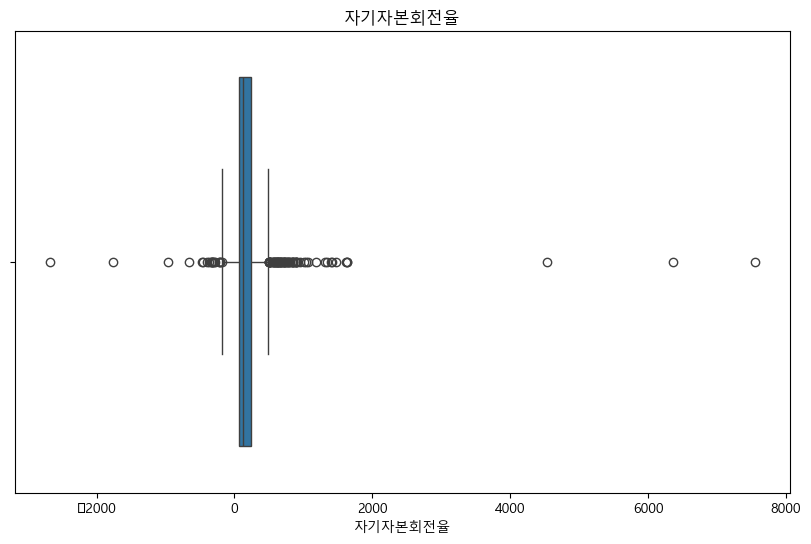

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


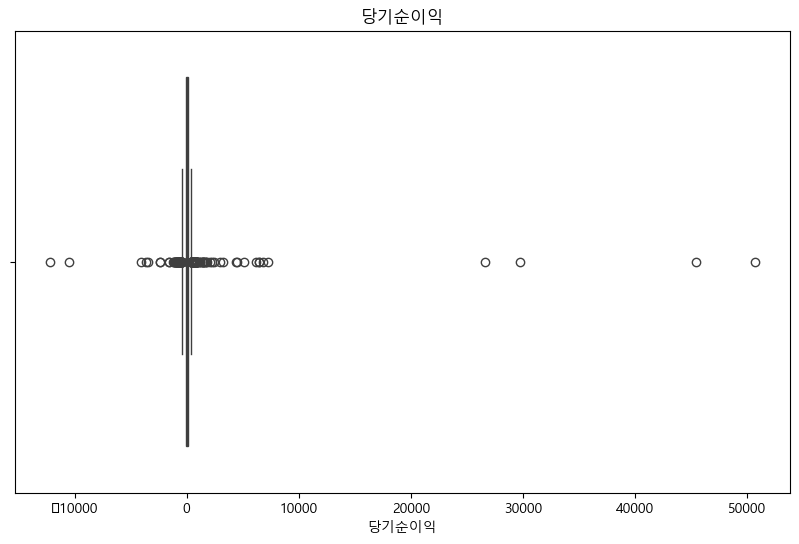

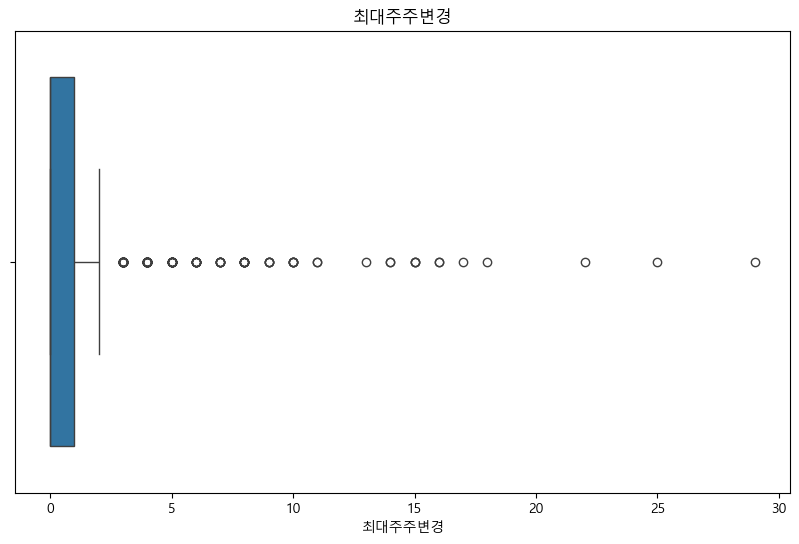

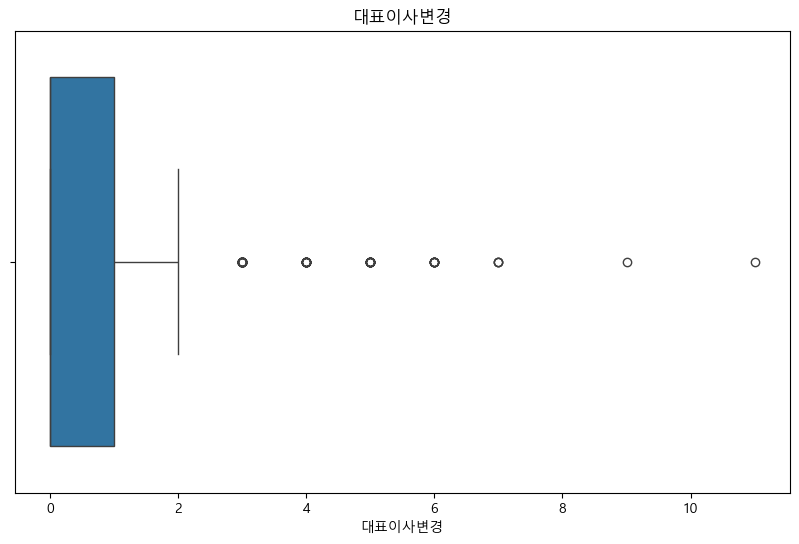

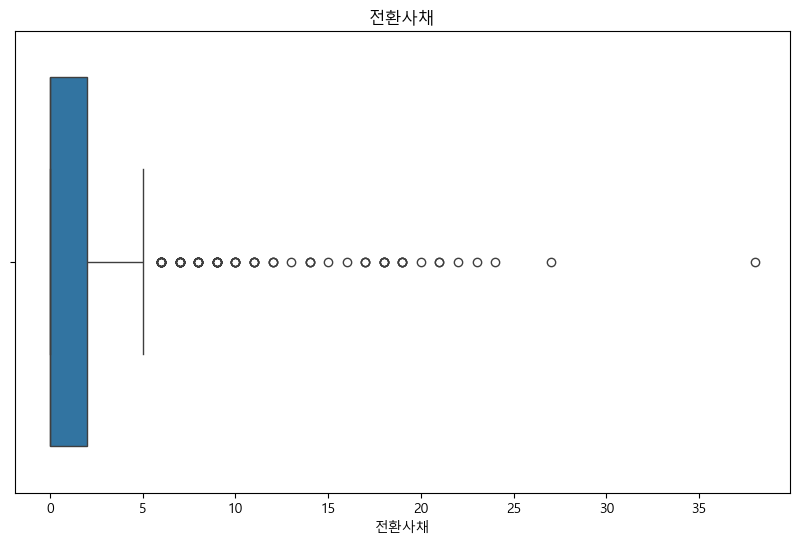

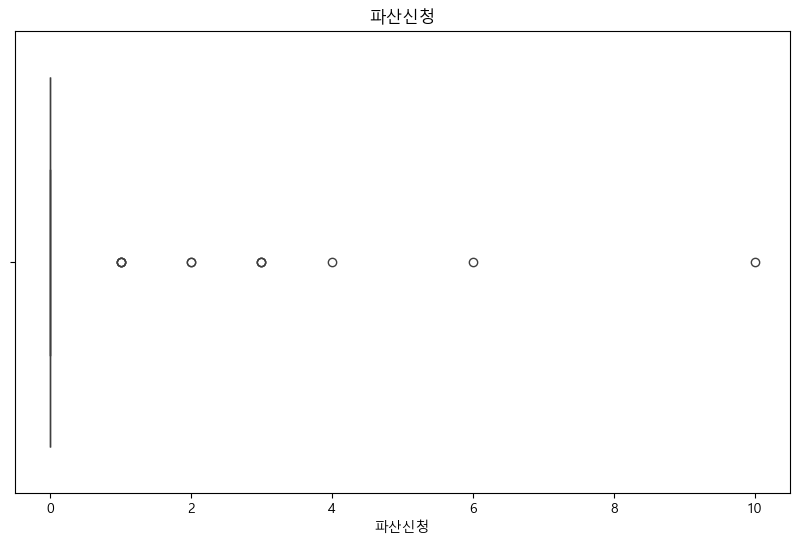

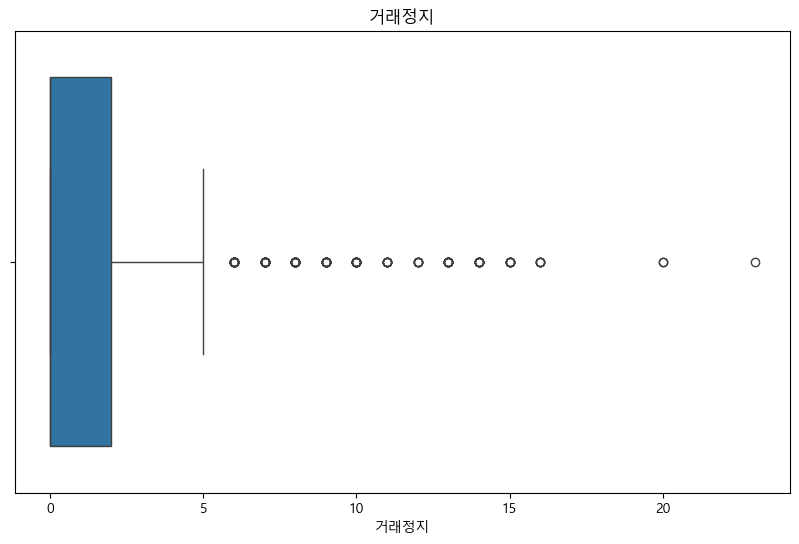

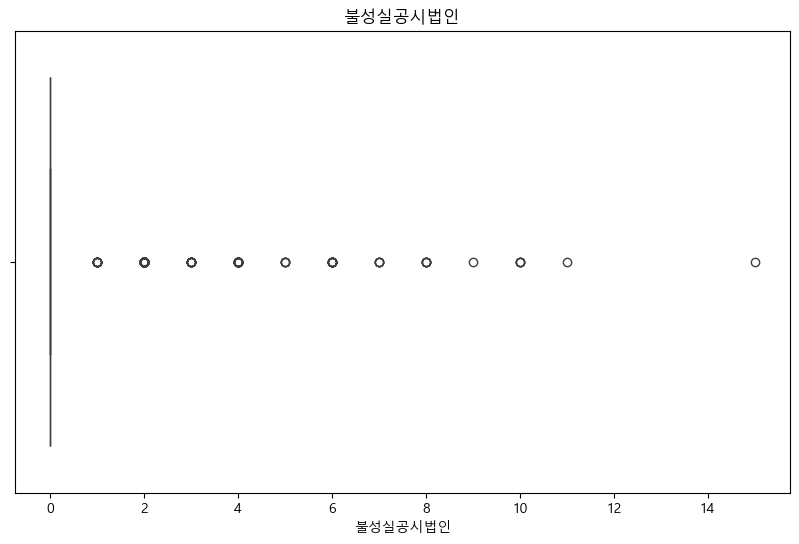

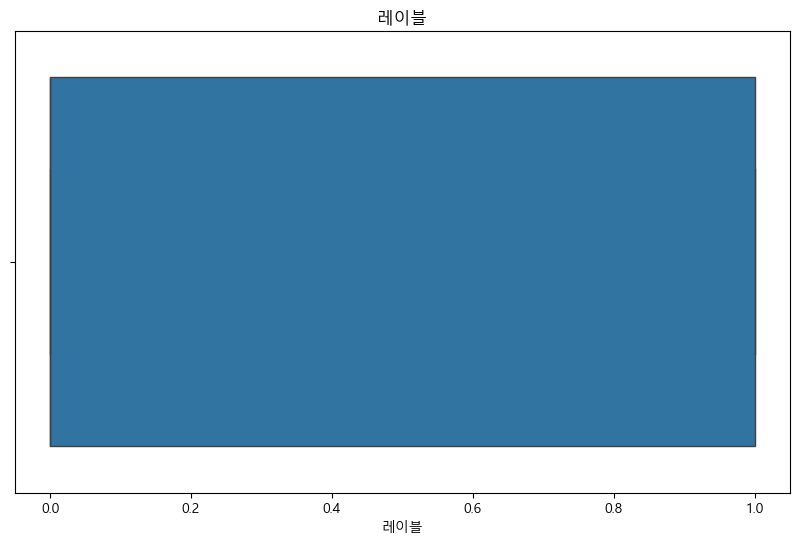

In [14]:
# 데이터 전처리
financial = pd.concat([financial_train, non_financial_train], axis=1)
financial = financial.drop(["레이블"], axis=1)
financial = financial.drop(["종목코드"], axis=1)
financial = pd.concat([financial, financial_train["레이블"]], axis=1)
# 이상값 확인
financial[financial['매출액증가율'] >= 60]
financial[financial['당기순이익'] >= 400000]
# 이상값을 평균값으로 대체
average_value = financial['매출액증가율'].mean()
financial.loc[financial['매출액증가율'] >= 60, '매출액증가율'] = average_value
average_value= financial['당기순이익'].mean()
financial.loc[financial['당기순이익'] >= 400000, '당기순이익'] = average_value
# 전처리 확인
financial[financial['매출액증가율'] >= 60]
financial[financial['당기순이익'] >= 400000]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 모든 수치형 변수에 대해 Box plot을 개별적으로 그리기
num_columns = financial.select_dtypes(include='number').columns
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=financial[col])
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [15]:
financial['총자산대비부채비율'] = financial['총자산']*financial['부채비율']
financial

,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블,총자산대비부채비율
0,6130.333968,0.846342,-32.596321,-0.036030,-2674.128824,-661.336250,0,0,0,0,0,0,1,-199826.336250
1,719.682766,0.541509,-5.124169,-0.504883,-223.327431,-257.465802,0,0,0,0,2,0,1,-3687.776327
2,2062.599327,1.009479,4.145668,0.311749,519.444543,-994.835473,0,0,0,0,1,0,1,8550.852637
3,18007.307005,0.978722,2.499255,0.751287,342.479670,131.586231,0,0,2,0,1,0,1,45004.857559
4,2098.958240,0.583371,1.620366,0.022887,152.864625,49.455226,0,0,1,0,0,0,1,3401.080341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1985.405663,0.731531,0.113090,-0.054453,81.426011,120.266492,0,0,0,0,0,0,0,224.529795
896,2851.121376,1.416081,1.136097,0.169801,302.488733,143.421310,0,0,0,0,0,0,0,3239.150319
897,1985.320541,0.723308,0.944468,0.085490,140.644956,167.827144,0,0,0,0,0,0,0,1875.071842
898,57.717351,0.519267,0.804160,-0.119452,93.684109,2.420840,0,0,0,0,0,0,0,46.414012


In [16]:
# 모델추론
test_data=pd.read_excel('test.xlsx')
test_data['총자산대비부채비율'] = test_data['총자산']*test_data['부채비율']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data_final = financial[['거래정지','불성실공시법인','총자산','매출액증가율','총자산대비부채비율']]
target_final = financial['레이블']
test_final = test_data[['거래정지','불성실공시법인','총자산','매출액증가율','총자산대비부채비율']]
test_target = test_data['레이블']
lr = LogisticRegression()
lr.fit(data_final,target_final)

lr_pred_final = lr.predict(test_final)
print(lr_pred_final)

# 모델 평가
print(lr.score(data_final,target_final))
print(lr.score(test_final,test_target))

# 분류 보고서 출력
cr_final = classification_report(test_target,lr_pred_final,digits=4)
print("Logistic Regression Classification Report:")
print(cr_final)


# 혼동 행렬 출력
cm_final = confusion_matrix(test_target,lr_pred_final)
print("Confusion Matrix:")
print(cm_final)

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(test_target,lr_pred_final))


[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.9466666666666667
0.97
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9867    0.9737    0.9801        76
           1     0.9200    0.9583    0.9388        24

    accuracy                         0.9700       100
   macro avg     0.9533    0.9660    0.9595       100
weighted avg     0.9707    0.9700    0.9702       100

Confusion Matrix:
[[74  2]
 [ 1 23]]
Accuracy Score:
0.97


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 1 financial 및 non_financial 파일의 이상값을 전처리 
# 2 coef_값이 낮은 feature들을 편집하여 새로운 feature 추출
# 3 LogisticRegression을 이용하여 test파일로 모델테스트

# macro avg : (0.9533+0.9660+0.9595)/3 = 0.9596
# Accuracy score : 0.97